 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [38]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [39]:
# Reading whale returns
whale_data = Path(r"C:\Users\DELL\Desktop\assignment\module 4 assignment\whale_returns.csv")

whale_df = (pd.read_csv(whale_data, index_col="Date", parse_dates=True, infer_datetime_format=True))

In [40]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [41]:
# Drop nulls
whale_df.dropna(inplace = True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [42]:
# Reading algorithmic returns
algo_data = Path(r"C:\Users\DELL\Desktop\assignment\module 4 assignment\algo_returns.csv")

algo_df = (pd.read_csv(algo_data, index_col="Date", parse_dates=True, infer_datetime_format=True))

In [43]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [44]:
# Drop nulls
algo_df.dropna(inplace = True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [45]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_data = Path(r"C:\Users\DELL\Desktop\assignment\module 4 assignment\sp_tsx_history.csv")

sp_tsx_df = (pd.read_csv(sp_tsx_data, index_col="Date", parse_dates=True, infer_datetime_format=True))

In [46]:
# Check Data Types
sp_tsx_df["Close"].dtype

dtype('O')

In [47]:
# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "").str.replace(",", "")
sp_tsx_df.head()

sp_tsx_df["Close"] = sp_tsx_df["Close"].astype('float')
sp_tsx_df["Close"].dtype

C:\Users\DELL\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')

In [48]:
sp_tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [49]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_df.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [50]:
# Drop nulls
sp_tsx_daily_returns.dropna(inplace = True)

In [51]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns = sp_tsx_daily_returns.rename(columns={
    "Close": "S&P TSX"})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [52]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp_tsx_daily_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [53]:
combined_df.count()

SOROS FUND MANAGEMENT LLC      1029
PAULSON & CO.INC.              1029
TIGER GLOBAL MANAGEMENT LLC    1029
BERKSHIRE HATHAWAY INC         1029
Algo 1                         1029
Algo 2                         1029
S&P TSX                        1029
dtype: int64

In [54]:
combined_df = combined_df.dropna().copy()

In [55]:
combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
dtype: int64

In [56]:
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

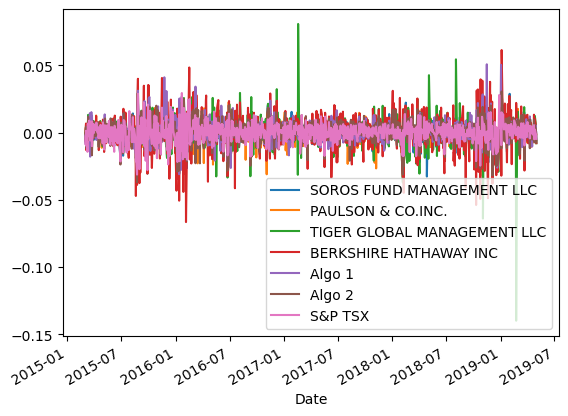

In [57]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

In [58]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()

cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<AxesSubplot:xlabel='Date'>

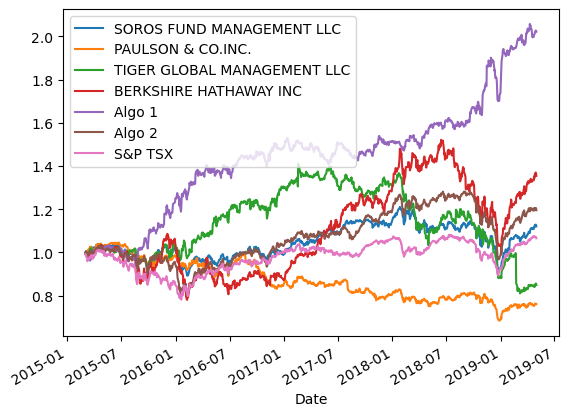

In [60]:
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

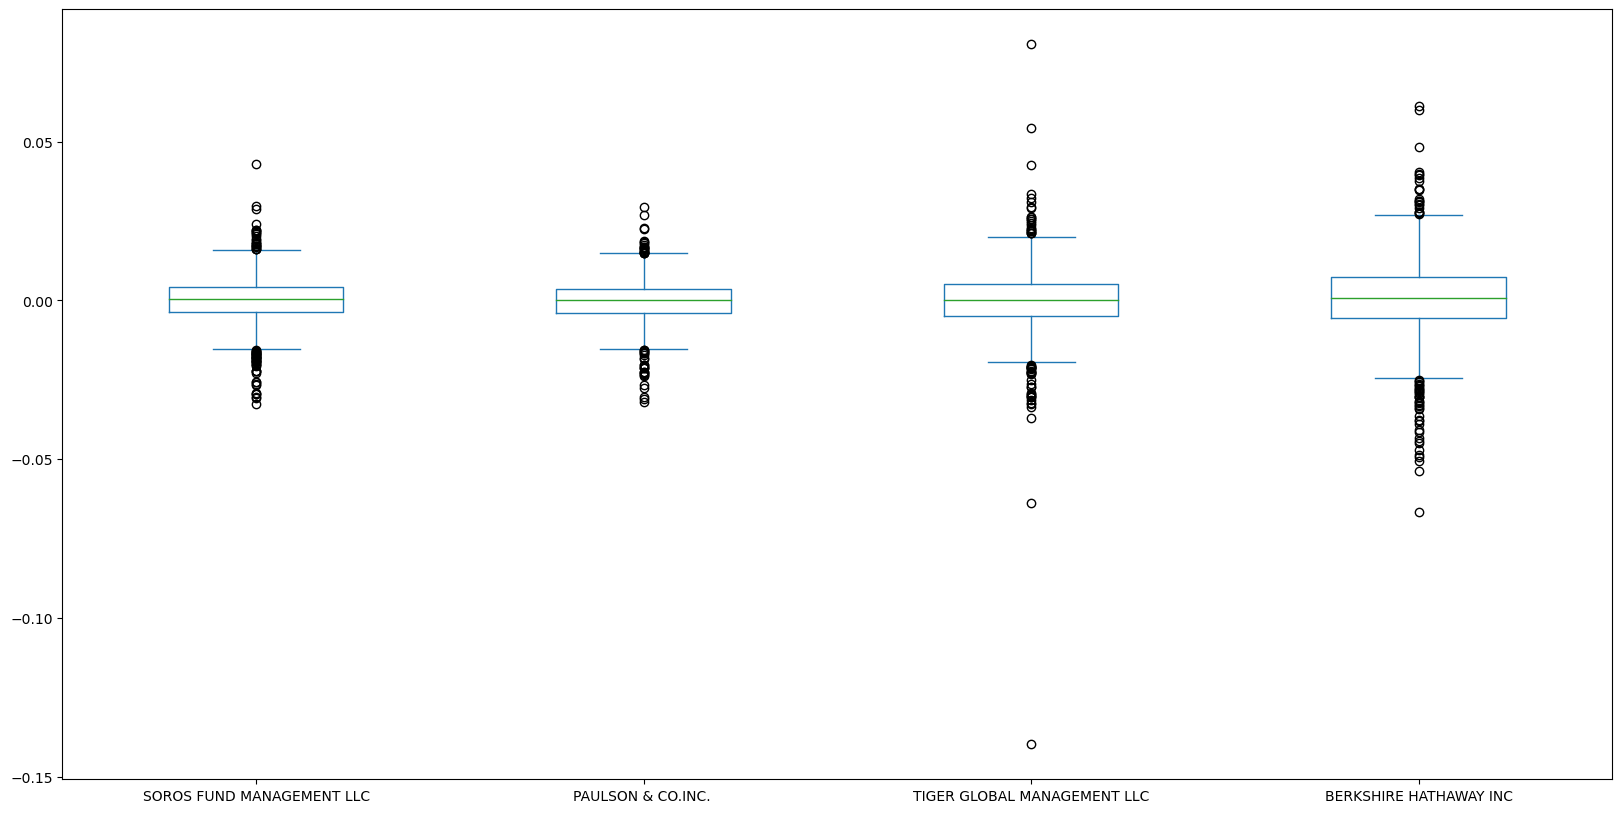

In [61]:
# Box plot to visually show risk

#Box plot for whale returns
whale_df.plot.box(figsize=(20, 10))

<AxesSubplot:>

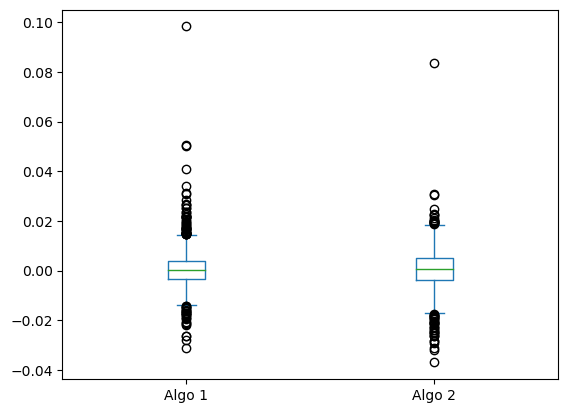

In [62]:
#Box plot for algo returns
algo_df.plot.box()

<AxesSubplot:>

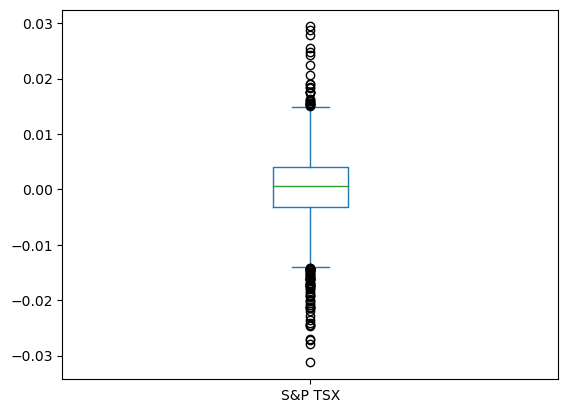

In [63]:
#Box plot for S&P TSX 60
sp_tsx_daily_returns.plot.box()

<AxesSubplot:>

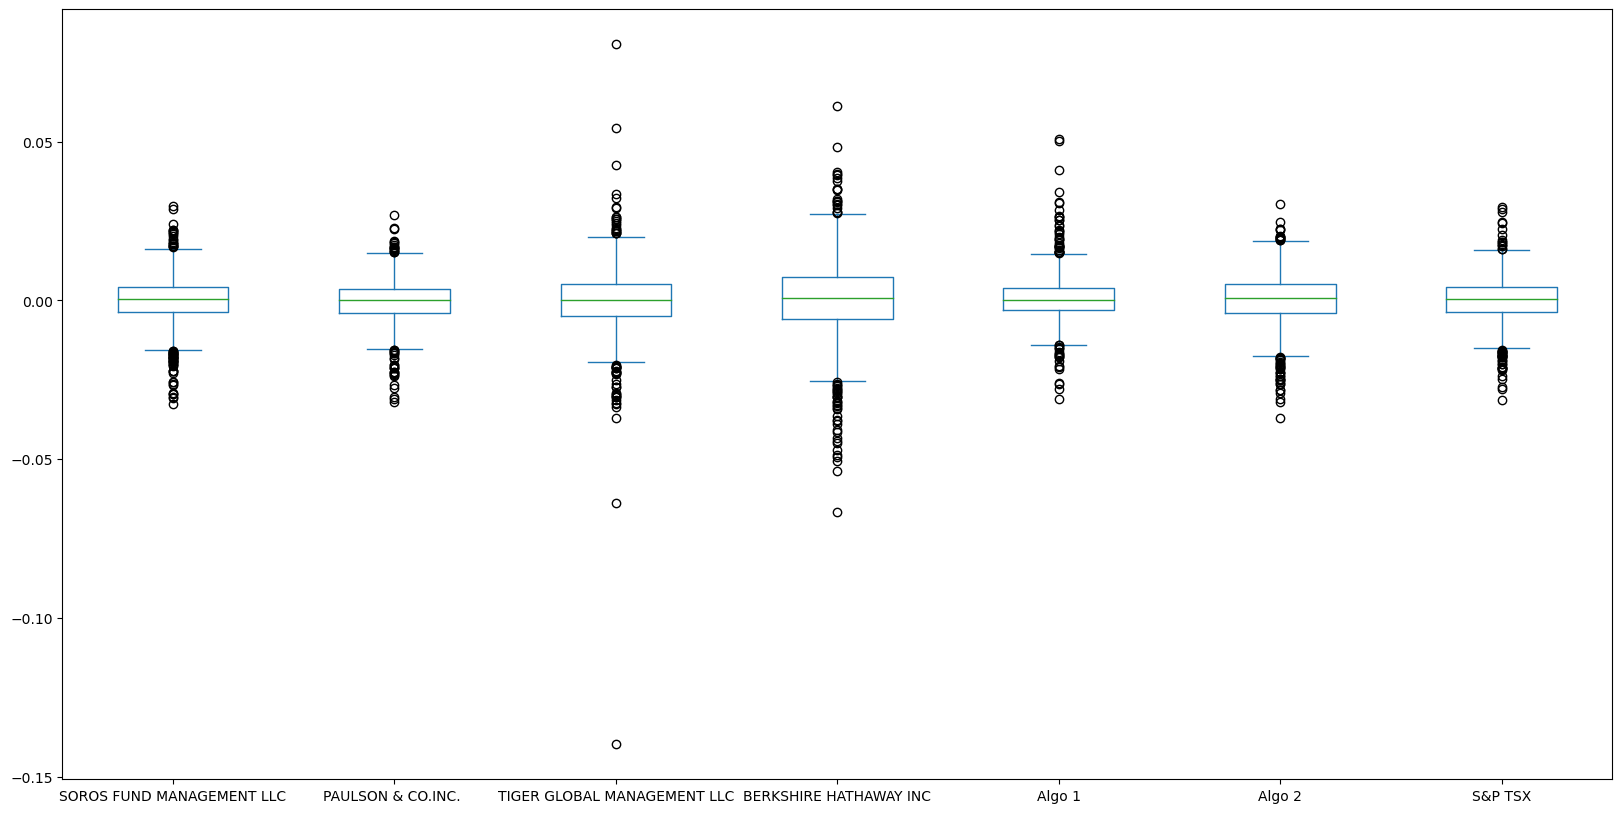

In [64]:
#Box plot for combined datafile
combined_df.plot.box(figsize=(20, 10))

### Calculate Standard Deviations

In [65]:
# Calculate the daily standard deviations of all portfolios

#standard deviation for whale returns
whale_df_std= whale_df.std()
whale_df_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [66]:
#Standard deviation for algo returns
algo_df_std = algo_df.std()
algo_df_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [67]:
#Standard deviation for S&P TSX 60
sp_tsx_daily_returns_std = sp_tsx_daily_returns.std()
sp_tsx_daily_returns_std.head()

S&P TSX    0.006637
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [68]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_daily_returns_std = sp_tsx_daily_returns.std()
sp_tsx_daily_returns_std.head()

S&P TSX    0.006637
dtype: float64

In [69]:
# Determine which portfolios are riskier than the S&P TSX 60

print("Based on the standard deviation calculation, both whale returns and algo returns are riskier than S&P TSX 60")

Based on the standard deviation calculation, both whale returns and algo returns are riskier than S&P TSX 60


### Calculate the Annualized Standard Deviation

In [70]:
# Calculate the annualized standard deviation (252 trading days)

# annualized standard deviation for whale returns
whale_annual_std = whale_df.std() * np.sqrt(252)

# annualized standard deviation for algo returns
algo_annual_std = algo_df.std() * np.sqrt(252)

# annualized standard deviation for S&P TSX 60
sp_tsx_annual_std = sp_tsx_daily_returns.std() * np.sqrt(252)

In [71]:
whale_annual_std

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [72]:
algo_annual_std

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [73]:
sp_tsx_annual_std

S&P TSX    0.105365
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [74]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# 21 day rolling standard deviation for whale returns
whale_df_21 = whale_df.rolling(window=21).std()
whale_df_21

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641
2019-04-26,0.004117,0.005649,0.005424,0.006599
2019-04-29,0.004123,0.005374,0.005438,0.006584


In [75]:
# 21 day rolling standard deviation for algo returns 
algo_df_21 = algo_df.rolling(window=21).std()
algo_df_21

,Algo 1,Algo 2
Date,,
2014-06-05,NaN,NaN
2014-06-06,NaN,NaN
2014-06-09,NaN,NaN
2014-06-10,NaN,NaN
2014-06-11,NaN,NaN
...,...,...
2019-04-25,0.005801,0.005764
2019-04-26,0.005562,0.005700
2019-04-29,0.005251,0.005622


In [76]:
# 21 day rolling standard deviation for S&P TSX 60
sp_tsx_21 = sp_tsx_daily_returns.rolling(window=21).std()
sp_tsx_21

,S&P TSX
Date,
2012-10-02,NaN
2012-10-03,NaN
2012-10-04,NaN
2012-10-05,NaN
2012-10-09,NaN
...,...
2019-12-20,0.003366
2019-12-23,0.003298
2019-12-24,0.003216


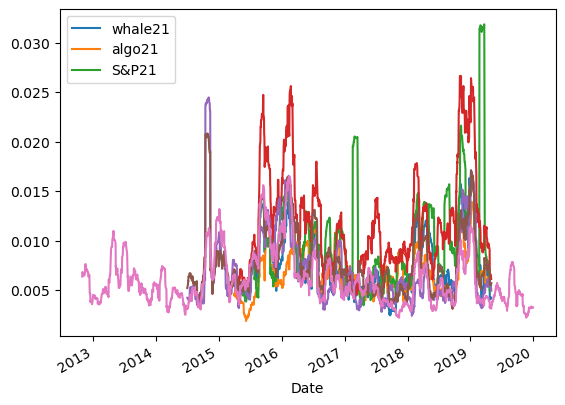

In [77]:
# Plot the rolling standard deviation
ax = whale_df.rolling(window=21).std().plot()

algo_df.rolling(window=21).std().plot(ax=ax)
sp_tsx_daily_returns.rolling(window=21).std().plot(ax=ax)

ax.legend(["whale21", "algo21", "S&P21"]);

### Calculate and plot the correlation

In [78]:
# Calculate the correlation

# Correlation of combined datafile
combined_correlation = combined_df.corr()
combined_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [79]:
import seaborn as sns

<AxesSubplot:>

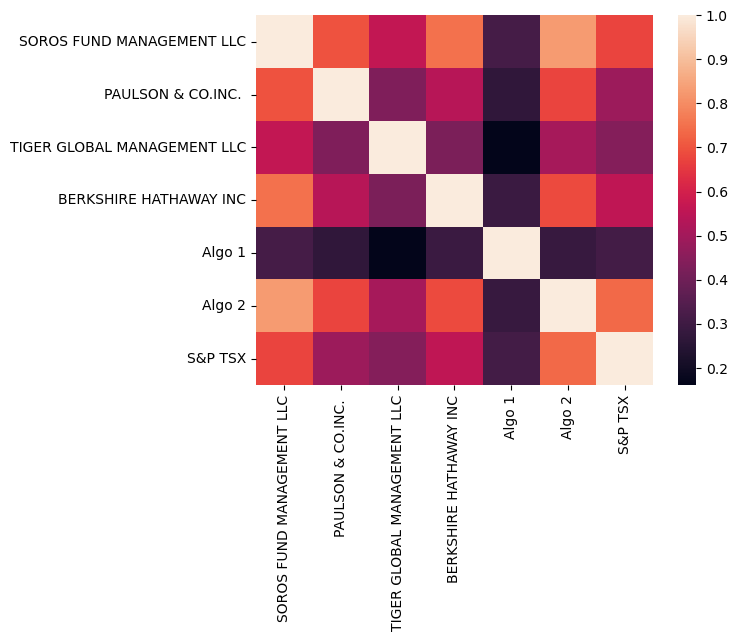

In [80]:
# Display the correlation matrix
sns.heatmap(combined_correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [81]:
# Calculate covariance of a single portfolio

# Covariance of Algo 1 portfolio
algo_1_covariance = combined_df["Algo 1"].rolling(window=60).cov(combined_df["S&P TSX"])

print(algo_1_covariance)

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000002
2019-04-26    0.000002
2019-04-29    0.000002
2019-04-30    0.000002
2019-05-01    0.000002
Length: 1029, dtype: float64


In [82]:
# Calculate variance of S&P TSX
sp_variance = combined_df["S&P TSX"].rolling(window=60).var()

print(f"S&P TSX variance: {sp_variance}")

S&P TSX variance: Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 1029, dtype: float64


In [83]:
# Computing beta for Algo 1
algo_1_beta = algo_1_covariance / sp_variance

print(algo_1_beta)

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.143726
2019-04-26    0.145294
2019-04-29    0.141913
2019-04-30    0.160629
2019-05-01    0.118788
Length: 1029, dtype: float64


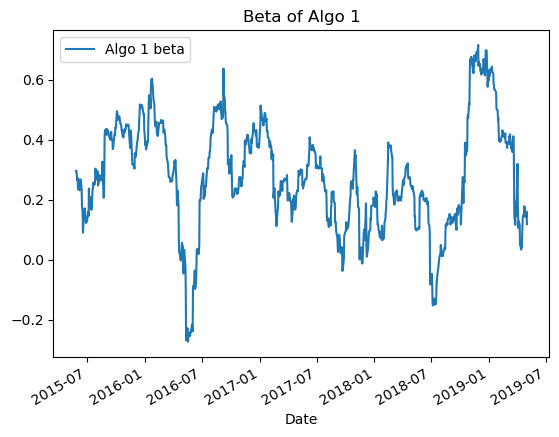

In [84]:
# Plot beta trend
ax = algo_1_beta.plot(title = "Beta of Algo 1")

ax.legend(["Algo 1 beta"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [85]:
# Use `ewm` to calculate the rolling window

# Defining ewn
ewn = combined_df.ewm(com=0.5).mean()

ewn

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.001356,0.001186,-0.002024,0.001518,-0.006927,0.001575,-0.004660
2015-03-05,0.003198,0.003187,0.001007,0.005124,-0.002793,0.003478,-0.000504
2015-03-06,-0.004297,-0.001377,-0.005397,-0.007176,-0.004253,-0.006606,-0.006895
2015-03-09,-0.001031,0.002373,0.002127,-0.003478,-0.005052,-0.001311,-0.006667
...,...,...,...,...,...,...,...
2019-04-25,0.000791,-0.000567,-0.003942,0.002792,0.001042,-0.004101,-0.001123
2019-04-26,0.005697,0.005919,0.006922,0.007887,0.002335,0.002137,0.001128
2019-04-29,0.002735,0.003786,0.006475,0.006111,0.004250,0.002599,-0.000149


In [86]:
# Calculating ewn over a 21 Day rolling window
ewn_21 = ewn.rolling(window = 21).mean()

ewn_21

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.001992,0.000079,0.000714,0.002175,0.000879,0.001068,0.001324
2019-04-26,0.002371,0.000550,0.001092,0.002675,0.000661,0.001282,0.001378
2019-04-29,0.002435,0.001014,0.001228,0.002818,0.000438,0.001260,0.001326


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [87]:
# Annualized Sharpe Ratios
combined_sharpe_ratio = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
combined_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Annual Sharpe ratio of Combined datafile'}>

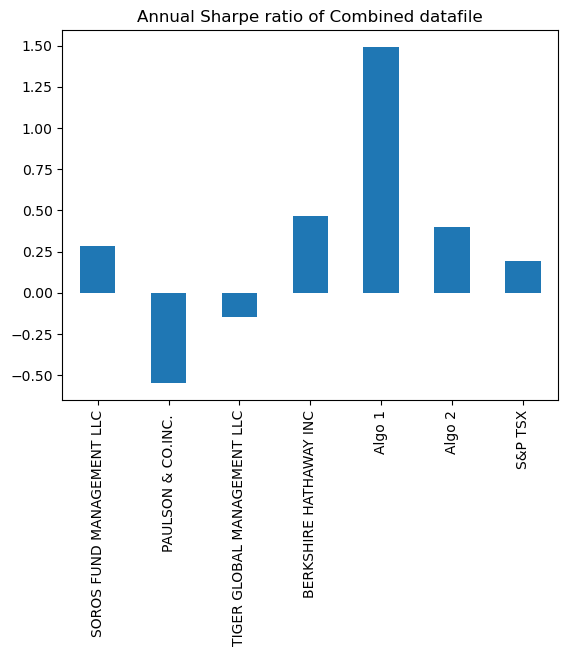

In [88]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratio.plot.bar(title = "Annual Sharpe ratio of Combined datafile")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---The Algo 1 portfolio strategy has outperfromed S&P TSX 60 and all the whales portfolios. But in case of Algo 2 portfolio, Berkshire Hathaway Inc has done better than Algo 2.  

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [89]:
# Reading data from 1st stock
otex_data = Path(r"C:\Users\DELL\Desktop\assignment\module 4 assignment\otex_historical.csv")

otex_df = pd.read_csv(otex_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [90]:
# Reading data from 2nd stock
L_data = Path(r"C:\Users\DELL\Desktop\assignment\module 4 assignment\l_historical.csv")

L_df = pd.read_csv(L_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [91]:
# Reading data from 3rd stock
shop_data = Path(r"C:\Users\DELL\Desktop\assignment\module 4 assignment\shop_historical.csv")

shop_df = pd.read_csv(shop_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [92]:
# Combine all stocks in a single DataFrame
custom_portfolio_df = pd.concat([otex_df, L_df, shop_df], axis="columns", join="inner")

In [93]:
custom_portfolio_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,OTEX,43.58,L,57.99,SHOP,132.06
2018-01-03,OTEX,43.07,L,57.41,SHOP,135.15
2018-01-04,OTEX,42.91,L,57.42,SHOP,137.46
2018-01-05,OTEX,42.57,L,57.42,SHOP,137.26
2018-01-08,OTEX,42.16,L,56.86,SHOP,139.51


In [94]:
# Reorganize portfolio data by having a column per symbol

# Droping the symbol columns
custom_portfolio_df = custom_portfolio_df.drop(columns=["Symbol", "Symbol", "Symbol"])

# Renaming the columns
columns = ["Otex", "L", "Shop"]

custom_portfolio_df.columns = columns

In [95]:
custom_portfolio_df.head()

,Otex,L,Shop
Date,,,
2018-01-02,43.58,57.99,132.06
2018-01-03,43.07,57.41,135.15
2018-01-04,42.91,57.42,137.46
2018-01-05,42.57,57.42,137.26
2018-01-08,42.16,56.86,139.51


In [96]:
# Calculate daily returns
custom_portfolio_daily_returns = custom_portfolio_df.pct_change()

In [97]:
custom_portfolio_daily_returns.isnull().sum()

Otex    1
L       1
Shop    1
dtype: int64

In [98]:
# Drop NAs
custom_portfolio_daily_returns.dropna(inplace=True)

In [99]:
# Display sample data
custom_portfolio_daily_returns.head()

,Otex,L,Shop
Date,,,
2018-01-03,-0.011703,-0.010002,0.023398
2018-01-04,-0.003715,0.000174,0.017092
2018-01-05,-0.007924,0.000000,-0.001455
2018-01-08,-0.009631,-0.009753,0.016392
2018-01-09,-0.000712,0.008969,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [100]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = custom_portfolio_daily_returns.dot(weights)

# Display sample data
custom_portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [101]:
# Join your returns DataFrame to the original returns DataFrame
aggregate_df = pd.concat([combined_df, custom_portfolio_daily_returns], axis="columns", join="inner")

In [102]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
aggregate_df.dropna(inplace=True)

aggregate_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Otex,L,Shop
Date,,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,-0.011703,-0.010002,0.023398
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,-0.003715,0.000174,0.017092
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.007924,0.000000,-0.001455
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.009631,-0.009753,0.016392
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000712,0.008969,-0.011254
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.006224,0.007398,-0.003240
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.000773,-0.003672,0.012628
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,-0.006181,0.002918,0.013173


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [103]:
# Calculate the annualized `std`
aggregate_annual_std = aggregate_df.std() * np.sqrt(252)

aggregate_annual_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX                        0.099121
Otex                           0.225703
L                              0.162907
Shop                           0.504079
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [104]:
# Calculate rolling standard deviation
aggregate_df_21 = aggregate_df.rolling(window=21).std()
aggregate_df_21

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Otex,L,Shop
Date,,,,,,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370,0.009317,0.006348,0.018343
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321,0.009211,0.006145,0.017670
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356,0.008478,0.005984,0.017479


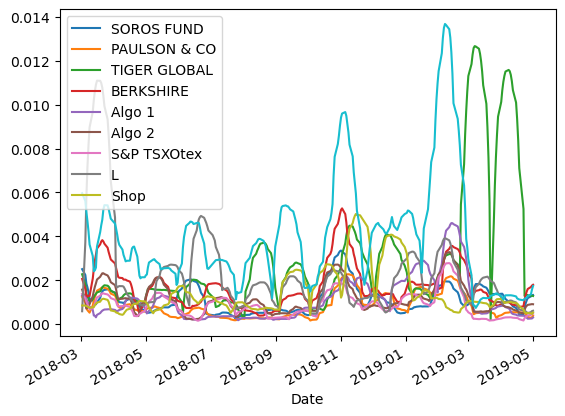

In [105]:
# Plot rolling standard deviation
ax = aggregate_df_21.rolling(window=21).std().plot()

ax.legend(["SOROS FUND", "PAULSON & CO", "TIGER GLOBAL", "BERKSHIRE", "Algo 1", "Algo 2", "S&P TSX" "Otex", "L", "Shop"]);

### Calculate and plot the correlation

In [106]:
# Calculate and plot the correlation

# Correlation of aggregate datafile
aggregate_correlation = aggregate_df.corr()
aggregate_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Otex,L,Shop
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.383971,0.192009,0.508507
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.320638,0.164145,0.317837
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.250926,0.339680,0.183726
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.413242,0.130815,0.637107
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.108323,0.099106,0.206226
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.426084,0.168862,0.507364
S&P TSX,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.450590,0.338382,0.462264
Otex,0.383971,0.320638,0.250926,0.413242,0.108323,0.426084,0.450590,1.000000,0.174320,0.395357
L,0.192009,0.164145,0.339680,0.130815,0.099106,0.168862,0.338382,0.174320,1.000000,0.113386
Shop,0.508507,0.317837,0.183726,0.637107,0.206226,0.507364,0.462264,0.395357,0.113386,1.000000


<AxesSubplot:>

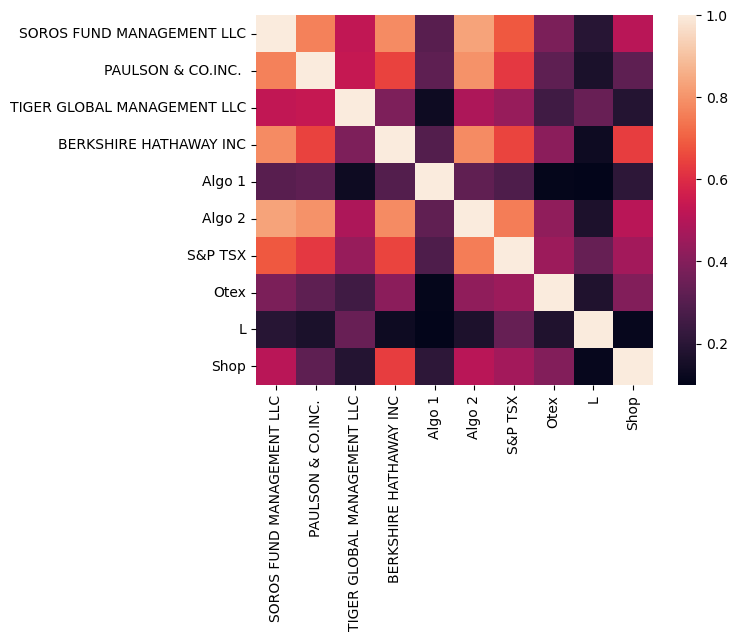

In [107]:
sns.heatmap(aggregate_correlation)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [108]:
# Calculate and plot Beta

# Covariance of Custom portfolio
otex_covariance = aggregate_df["Otex"].rolling(window=60).cov(aggregate_df["S&P TSX"])

print(otex_covariance)

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-04-25    0.000010
2019-04-26    0.000010
2019-04-29    0.000010
2019-04-30    0.000012
2019-05-01    0.000011
Length: 328, dtype: float64


In [109]:
# Calculate variance of S&P TSX
sp_tsx_variance = aggregate_df["S&P TSX"].rolling(window=60).var()

print (sp_tsx_variance)

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 328, dtype: float64


In [110]:
# Computing beta for Custom Portfolio
otex_beta = otex_covariance / sp_tsx_variance

print(otex_beta)

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-04-25    0.646177
2019-04-26    0.645270
2019-04-29    0.651207
2019-04-30    0.810731
2019-05-01    0.719166
Length: 328, dtype: float64


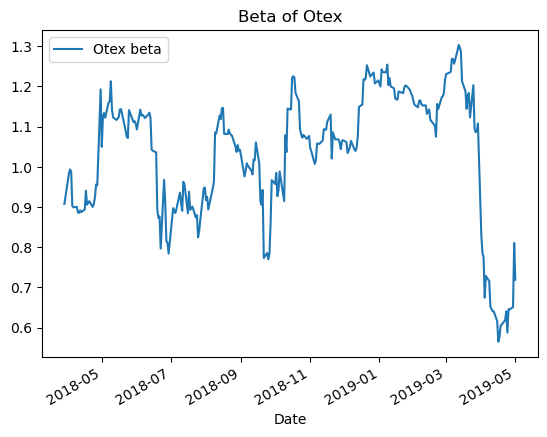

In [111]:
# Plot beta trend
ax = otex_beta.plot(title = "Beta of Otex")

ax.legend(["Otex beta"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [112]:
# Calculate Annualized Sharpe Ratios

# Annualized Sharpe Ratios of Aggregate datafile
aggregate_sharpe_ratio = (aggregate_df.mean() * 252) / (aggregate_df.std() * np.sqrt(252))
aggregate_sharpe_ratio

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
Otex                           0.762776
L                              0.532599
Shop                           1.575294
dtype: float64

<AxesSubplot:title={'center':'Annual Sharpe ratio of Aggregate datafile'}>

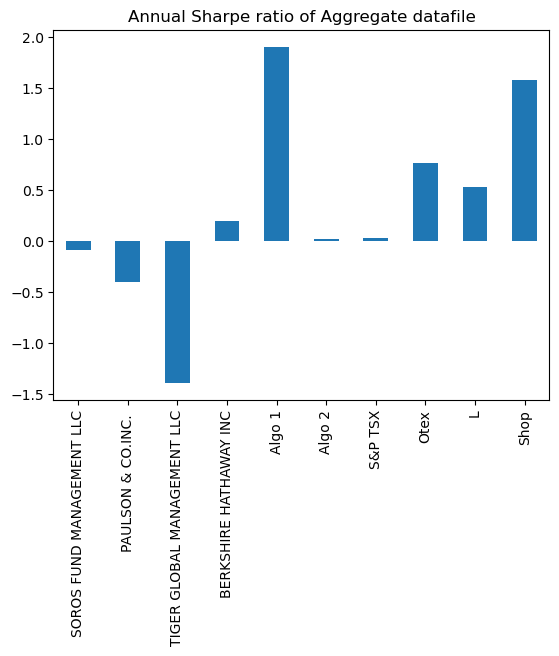

In [113]:
# Visualize the sharpe ratios as a bar plot
aggregate_sharpe_ratio.plot.bar(title = "Annual Sharpe ratio of Aggregate datafile")

### How does your portfolio do?

Write your answer here!

In [114]:
print("In comparison to S&P TSX as well as other whale portfolios, the custom portfolio is performing better on the metric of risk-to-return ratio. However, Algo 1 portfolio is outperforming the custom portfolio.")

In comparison to S&P TSX as well as other whale portfolios, the custom portfolio is performing better on the metric of risk-to-return ratio. However, Algo 1 portfolio is outperforming the custom portfolio.
